# EJERCICIO 1

Escriba una fución que verifique si existe un vuelo directo (es decir, una conexión sin escalas) entre el aeropuerto de Indianapolis (código IATA: IND) y el aeropuerto de Fairbanks, Alaska (código IATA: FAI) utilizando la red de vuelos de EE. UU. proporcionada.


In [2]:
import requests
import os
import networkx as nx
from utils.paths import DATA_RAW_DIR

In [3]:

response = requests.get("https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/raw/master/datasets/openflights/openflights_usa.graphml.gz")
download_folder = DATA_RAW_DIR
filename = 'openflights_usa.graphml.gz'
with open(os.path.join(download_folder, filename), 'wb') as file:
    file.write(response.content)
G = nx.read_graphml(os.path.join(download_folder, filename))

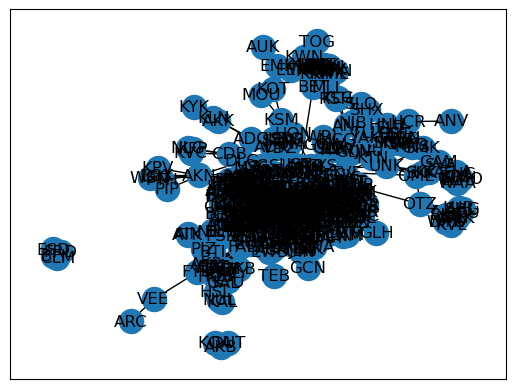

In [6]:
nx.draw_networkx(G, with_labels=True)

In [7]:
def check_direct_flight(G: nx.Graph, airport_code1: str, airport_code2: str) -> bool:
    """
    Verifica si existe un vuelo directo (una arista) entre dos aeropuertos en el grafo.
    """
    # your code here
    return G.has_edge(airport_code1, airport_code2)

assert check_direct_flight(G, 'IND', 'FAI') == G.has_edge('IND', 'FAI'), "IND-FAI direct flight check failed"

# EJERCICIO 2

Escriba una función que determine la ruta con el menor número de vuelos (es decir, el camino más corto en términos de conexiones o escalas) para viajar desde el aeropuerto de Indianapolis (IND) al aeropuerto de Fairbanks (FAI).


In [8]:
def find_shortest_route(G: nx.Graph, start_airport_code: str, end_airport_code: str) -> list:
    """
    Encuentra la ruta más corta (en número de aristas) entre dos aeropuertos.
    """
    # your code here
    return nx.shortest_path(G, start_airport_code, end_airport_code)
    
path_ind_fai = find_shortest_route(G, 'IND', 'FAI')
assert isinstance(path_ind_fai, list), "Path should be a list"

# Ejercicio 3

Escriba una función que evalúe si la red de aeropuertos de EE. UU. (representada por el grafo G) es conexa. En otras palabras, ¿es posible viajar entre cualquier par de aeropuertos en esta red, haciendo uso de una o más escalas si fuera necesario?"


In [9]:
def check_network_connectivity(G: nx.Graph) -> bool:
    """
    Verifica si el grafo dado es conexo.
    """
    # your code here
    return nx.is_connected(G)


is_G_connected = check_network_connectivity(G)
assert isinstance(is_G_connected, bool), "Result should be a boolean"